In [1]:
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # manipulasi angka data
import pandas as pd           # Dataframe ngulik 
import matplotlib.pyplot as plt # Buat ngeplot
import seaborn as sns
import plotly.plotly as py  # World Map
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler  # For skala dataset & normalisasi
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #buat import algo clustering
from sklearn.mixture import GaussianMixture #buat import algo GMM clustering

import os                     
import sys                    



In [2]:
wh = pd.read_csv("/home/aam/Downloads/2017(1).csv") #buat make dataset (ubah ke windows)
wh.head() #buat ngeliat dataset cuilan

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
print("Dimension of dataset: wh.shape")
wh.dtypes #ngeliatkan tipe2 datanya

Dimension of dataset: wh.shape


Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

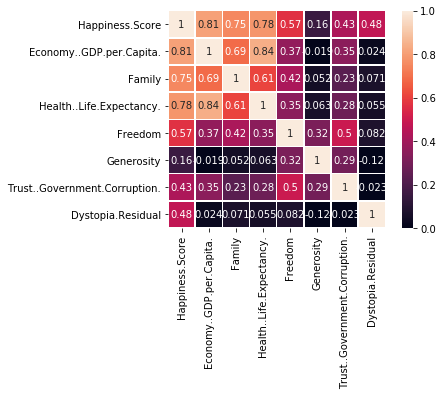

In [4]:
wh1 = wh[['Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.', 'Freedom', 
          'Generosity','Trust..Government.Corruption.','Dystopia.Residual']] #buat make kolom-kolom yang penting
cor = wh1.corr() #itung korelasinya atau hubungan antar data pake correlation matrix
sns.heatmap(cor, square = True, linewidth = .5, annot=True, vmin=0, vmax=1) 
#nge plot hubungan antar data, makin tinggi hubungannya makin besar score nya
#contohnya economy sama Health life skornya 0,84 berarti korelasinya tinggi

In [5]:
#Ref: https://plot.ly/python/choropleth-maps/
data = dict(type = 'choropleth', 
           locations = wh['Country'],
           locationmode = 'country names',
           z = wh['Happiness.Score'], 
           text = wh['Country'],
           colorbar = {'title':'Happiness'}
           ,colorscale = 'Rainbow')
layout = dict(title = 'Happiness Index 2017', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)
#ini plotting world map berdasarkan happiness score nya

In [6]:
#skalain data 
#soalnya clustering sangat sensitif sama yang namanya range data
ss = StandardScaler()
ss.fit_transform(wh1)

array([[ 1.93599602,  1.50618765,  1.20357658, ...,  0.8569643 ,
         1.90308437,  0.85629599],
       [ 1.92269283,  1.18651768,  1.26503623, ...,  0.80685634,
         2.73999784,  0.92989102],
       [ 1.90672969,  1.1823454 ,  1.47266877, ...,  1.70201314,
         0.30006609,  0.94796425],
       ...,
       [-1.77816933, -1.12910094, -0.51306362, ...,  0.79923322,
        -0.56334657, -2.4660431 ],
       [-2.17193469, -2.12929212, -1.95262416, ..., -0.31596505,
        -0.38459935, -0.33549229],
       [-2.35994869, -2.34773594, -4.15212515, ...,  0.253028  ,
        -0.65680192,  0.43290816]])

In [7]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(wh1, 2)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

#bikin cluster 2

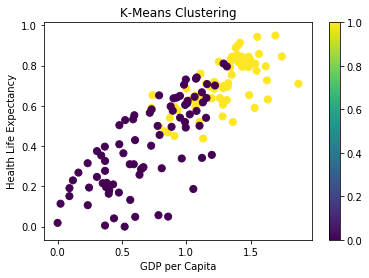

In [8]:
#Plot cluster Kmeans nya berdasarkan GDP dan Health
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Health..Life.Expectancy.'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Health Life Expectancy')
plt.colorbar(scatter)

In [9]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(wh1, 2)
agglomerative = pd.DataFrame(clust_labels1)
wh1.insert((wh1.shape[1]),'agglomerative',agglomerative)

#ini methode agglomeartive / hierarchial cluster pake 2 cluster

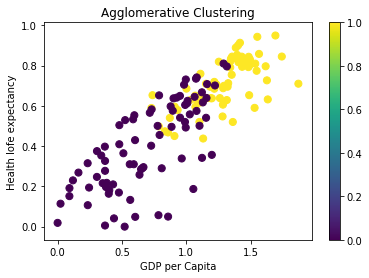

In [10]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Health..Life.Expectancy.'],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Health lofe expectancy')
plt.colorbar(scatter)

#ini scatter plot hierarchial clustering

In [11]:
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(wh1)
affinity = pd.DataFrame(clust_labels2)
wh1.insert((wh1.shape[1]),'affinity',affinity)
#ini Affinity cluster

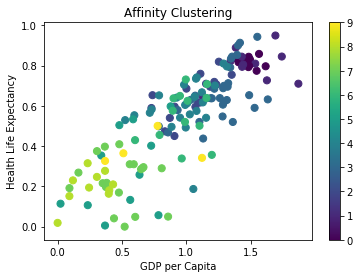

In [12]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Health..Life.Expectancy.'],
                     c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Health Life Expectancy')
plt.colorbar(scatter)

#ini plot affinity 

In [13]:
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(wh1,2)
gmm = pd.DataFrame(clust_labels3)
wh1.insert((wh1.shape[1]),'gmm',gmm)
 #ini plotting gaussian mixture model

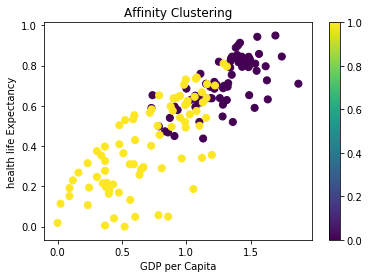

In [14]:
#Plotting the cluster obtained using GMM
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Health..Life.Expectancy.'],
                     c=gmm[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('health life Expectancy')
plt.colorbar(scatter)

In [15]:
wh1.head()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans,agglomerative,affinity,gmm
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,1,1,0,0
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,1,1,0,0
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,1,1,0,0
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,1,1,0,0
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,1,1,0,0


In [16]:
wh1.insert(0,'Country',wh.iloc[:,0])
wh1.iloc[:,[0,9,10,11]]

scl = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],

data = [dict(type='choropleth',
             locations = wh1['Country'],
             locationmode = 'country names',
             z = wh1['kmeans'],
             text = wh1['Country'],
             colorbar = {'title':'Cluster Group'},
            colorscape = 'Viridis')]


layout = dict(title='Clustering of Countries based on K-Means',
              geo=dict(showframe = False,
                       projection = {'type':'mercator'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)

ValueError: Invalid property specified for object of type plotly.graph_objs.Choropleth: 'colorscape'

    Valid properties:
        autocolorscale
            Determines whether the colorscale is a default palette
            (`autocolorscale: true`) or the palette determined by
            `colorscale`. In case `colorscale` is unspecified or
            `autocolorscale` is true, the default  palette will be
            chosen according to whether numbers in the `color`
            array are all positive, all negative or mixed.
        coloraxis
            Sets a reference to a shared color axis. References to
            these shared color axes are "coloraxis", "coloraxis2",
            "coloraxis3", etc. Settings for these shared color axes
            are set in the layout, under `layout.coloraxis`,
            `layout.coloraxis2`, etc. Note that multiple color
            scales can be linked to the same color axis.
        colorbar
            plotly.graph_objs.choropleth.ColorBar instance or dict
            with compatible properties
        colorscale
            Sets the colorscale. The colorscale must be an array
            containing arrays mapping a normalized value to an rgb,
            rgba, hex, hsl, hsv, or named color string. At minimum,
            a mapping for the lowest (0) and highest (1) values are
            required. For example, `[[0, 'rgb(0,0,255)', [1,
            'rgb(255,0,0)']]`. To control the bounds of the
            colorscale in color space, use`zmin` and `zmax`.
            Alternatively, `colorscale` may be a palette name
            string of the following list: Greys,YlGnBu,Greens,YlOrR
            d,Bluered,RdBu,Reds,Blues,Picnic,Rainbow,Portland,Jet,H
            ot,Blackbody,Earth,Electric,Viridis,Cividis.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on plot.ly for  customdata .
        geo
            Sets a reference between this trace's geospatial
            coordinates and a geographic map. If "geo" (the default
            value), the geospatial coordinates refer to
            `layout.geo`. If "geo2", the geospatial coordinates
            refer to `layout.geo2`, and so on.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on plot.ly for  hoverinfo .
        hoverlabel
            plotly.graph_objs.choropleth.Hoverlabel instance or
            dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". See https://github.com/d3/d3-format
            /blob/master/README.md#locale_format for details on the
            formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plot.ly/javascript/plotlyjs-events/#event-data.
            Additionally, every attributes that can be specified
            per-point (the ones that are `arrayOk: true`) are
            available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on plot.ly for  hovertemplate
            .
        hovertext
            Same as `text`.
        hovertextsrc
            Sets the source reference on plot.ly for  hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on plot.ly for  ids .
        locationmode
            Determines the set of locations used to match entries
            in `locations` to regions on the map.
        locations
            Sets the coordinates via location IDs or names. See
            `locationmode` for more info.
        locationssrc
            Sets the source reference on plot.ly for  locations .
        marker
            plotly.graph_objs.choropleth.Marker instance or dict
            with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on plot.ly for  meta .
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        reversescale
            Reverses the color mapping if true. If true, `zmin`
            will correspond to the last color in the array and
            `zmax` will correspond to the first color.
        selected
            plotly.graph_objs.choropleth.Selected instance or dict
            with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showscale
            Determines whether or not a colorbar is displayed for
            this trace.
        stream
            plotly.graph_objs.choropleth.Stream instance or dict
            with compatible properties
        text
            Sets the text elements associated with each location.
        textsrc
            Sets the source reference on plot.ly for  text .
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            plotly.graph_objs.choropleth.Unselected instance or
            dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        z
            Sets the color values.
        zauto
            Determines whether or not the color domain is computed
            with respect to the input data (here in `z`) or the
            bounds set in `zmin` and `zmax`  Defaults to `false`
            when `zmin` and `zmax` are set by the user.
        zmax
            Sets the upper bound of the color domain. Value should
            have the same units as in `z` and if set, `zmin` must
            be set as well.
        zmid
            Sets the mid-point of the color domain by scaling
            `zmin` and/or `zmax` to be equidistant to this point.
            Value should have the same units as in `z`. Has no
            effect when `zauto` is `false`.
        zmin
            Sets the lower bound of the color domain. Value should
            have the same units as in `z` and if set, `zmax` must
            be set as well.
        zsrc
            Sets the source reference on plot.ly for  z .
        

In [ ]:
data = [dict(type='choropleth',
             locations = wh1['Country'],
             locationmode = 'country names',
             z = wh1['kmeans'],
             text = wh1['Country'],
             colorbar = {'title':'Cluster Group'},
             colorscale = 'Viridis')]
layout = dict(title='Clustering of Countries based on K-Means',
              geo=dict(showframe = False,
                       projection = {'type':'mercator'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)

In [ ]:
data = [dict(type='choropleth',
             locations = wh1['Country'],
             locationmode = 'country names',
             z = wh1['agglomerative'],
             text = wh1['Country'],
             colorbar = {'title':'Cluster Group'},
            colorscale = 'Viridis')]
layout = dict(title='Grouping of Countries based on Agglomerative Clustering',
              geo=dict(showframe = False, 
                       projection = {'type':'mercator'}))
map2 = dict(data=data, layout=layout)
iplot(map2)

In [ ]:
data = [dict(type='choropleth',
             locations = wh1['Country'],
             locationmode = 'country names',
             z = wh1['affinity'],
             text = wh1['Country'],
             colorbar = {'title':'Cluster Group'},
            colorscale = 'Viridis')]
layout = dict(title='Grouping of Countries based on Affinity Clustering',
              geo=dict(showframe = False, projection = {'type':'mercator'}))
map3 = dict(data=data, layout=layout)
iplot(map3)

In [ ]:
data = [dict(type='choropleth',
             locations = wh1['Country'],
             locationmode = 'country names',
             z = wh1['gmm'],
             text = wh1['Country'],
             colorbar = {'title':'Cluster Group'},
            colorscale = 'Viridis')]
layout = dict(title='Grouping of Countries based on GMM clustering',
              geo=dict(showframe = False, projection = {'type':'mercator'}))
map4 = dict(data=data, layout=layout)
iplot(map4)